# Taux de change du Yen Japonnais

Nous allons effectuer une analyse descriptive du taux de change du Yen depuis 1999. D'abord il faut importer les données. Il faudra aussi convertir les dates en type 'datetime'. Nous avons 2 colonnes dont Date et FME (Foreign money exchanges).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("datas.csv", sep=";")
df['Date'] = pd.to_datetime(df['Date'])

print(df.head(7))


        Date     FME
0 1999-01-04  133.73
1 1999-01-05  130.96
2 1999-01-06  131.42
3 1999-01-07  129.43
4 1999-01-08  130.09
5 1999-01-11  126.33
6 1999-01-12  129.63


#### Représentation graphique:

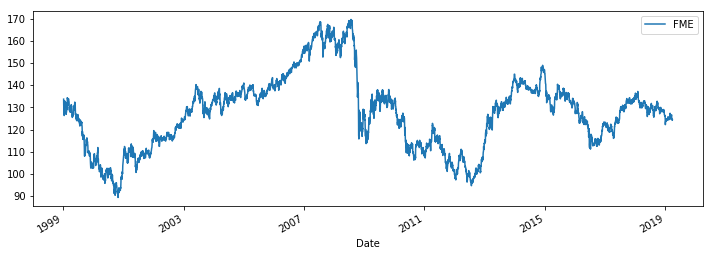

In [2]:
df.plot(x='Date',y='FME',kind='line',figsize=(12,4))

In [2]:
fme = df['FME']

#### Description statistique

In [4]:
print('Taille de l\'échantillon:',len(fme))
print('Moyenne :',round(np.mean(fme),2))
print('Variance :',round(np.var(fme),2))
print('Ecart-type :',round(np.std(fme),2))
print('Médianne:',np.median(fme))
print('Quantile 1/4:',np.percentile(fme,25))
print('Quantile 3/4:',np.percentile(fme,75))
print('Maximum du FME',max(fme))
print('Minimi du FME',min(fme))
print('Etendue:',max(fme)-min(fme))

Taille de l'échantillon: 5183
Moyenne : 127.52
Variance : 273.17
Ecart-type : 16.53
Médianne: 129.01
Quantile 1/4: 115.12
Quantile 3/4: 136.33
Maximum du FME 169.75
Minimi du FME 89.3
Etendue: 80.45


On peut utiliser des classes d'étendue 8

In [5]:
def classes_statistiques(ech,nbc):
    start=min(ech)
    end = (max(ech)-min(ech))/nbc
    i=1
    while(i<=end):
        sum=0
        j=0
        while(j<len(ech)):
            if ech[j]>start and ech[j]<start+end:
                sum +=1
                j+=1
            else:
                j+=1
        print(start,'<= x <=',start+end," = ",sum)
        start+=end
        i+=1        

classes_statistiques(fme,10)

89.3 <= x <= 97.345  =  108
97.345 <= x <= 105.39  =  390
105.39 <= x <= 113.435  =  652
113.435 <= x <= 121.48  =  610
121.48 <= x <= 129.525  =  900
129.525 <= x <= 137.57  =  1394
137.57 <= x <= 145.61499999999998  =  515
145.61499999999998 <= x <= 153.65999999999997  =  168


### Prévision pour Mars 2019

## ANN and LSTM models

Nous allons essayer deux modèles relatifs au machine learning pour prédir le cours du taux de change du Yen Japonnais. On va d'abord appliquer le ANN (artificial neural network) et le LSTM RNN (long short terme memory recurrent neural network.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM


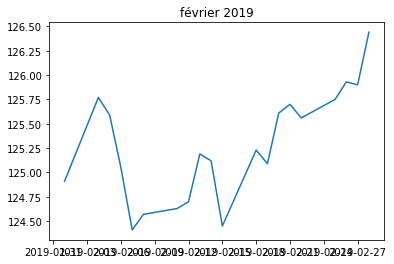

In [13]:
df = df.set_index(['Date'], drop=True)
df.head(10)

debF = pd.Timestamp('2019-01-31')
finF = pd.Timestamp('2019-03-01')

antMars = df[df.index<finF]

fev = df[np.logical_and(df.index>debF,df.index<finF)]
plt.plot(fev)
plt.title('février 2019')

plt.show()


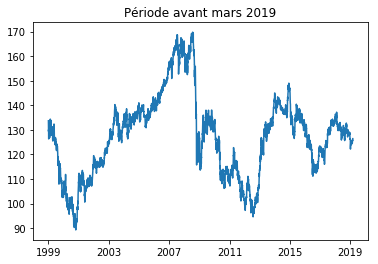

In [15]:
plt.plot(antMars)
plt.title('Période avant mars 2019')
plt.show()

La première étape est de séparer les données entre données d'entrainement (avant mars) et données test (mars)

<Figure size 720x432 with 0 Axes>

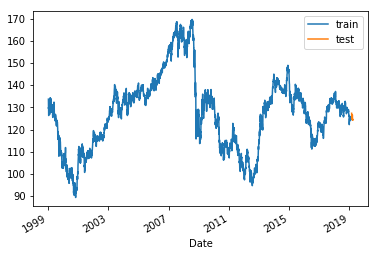

In [16]:
train = antMars
test = df[df.index>=finF]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

Il est généralement important de normaliser les données il faut donc faire un 'scale'. Nous allons donc prendre le model, l'appliquer aux données et aussi 'entrainer' les données.

In [17]:
train = train.values.reshape(-1,1)
test = test.values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(-1,1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
5161/5161 [==============================] - 25s 5ms/step - loss: 7.7936e-04
Epoch 2/100
5161/5161 [==============================] - 24s 5ms/step - loss: 7.0238e-04
Epoch 3/100
5161/5161 [==============================] - 24s 5ms/step - loss: 6.9230e-04
Epoch 4/100
5161/5161 [==============================] - 24s 5ms/step - loss: 6.9054e-04
Epoch 5/100
5161/5161 [==============================] - 23s 4ms/step - loss: 6.8436e-04
Epoch 6/100
5161/5161 [==============================] - 22s 4ms/step - loss: 6.8308e-04
Epoch 7/100
5161/5161 [==============================] - 20s 4ms/step - loss: 6.8041e-04
Epoch 8/100
5161/5161 [==============================] - 22s 4ms/step - loss: 6.7865e-04
Epoch 9/100
5161/5161 [==============================] - 23s 5ms/step - loss: 6.7652e-04
Epoch 10/100
5161/5161 [==============================] - 22s 4ms/step - loss: 6.7434e-04
Epoch 11/100
5161/5161 [==============================] - 23s 5ms/step - loss: 6.7333e-04
Epoch 12/100
5161/5

In [18]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))


The R2 score on the Train set is:	0.934
The R2 score on the Test set is:	0.734


Voyons maintenant le modèle LSTM RNN et comparons ensuite leur 'score'

On procède de la même manière

In [19]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [20]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))


Epoch 1/100
5161/5161 [==============================] - 33s 6ms/step - loss: 0.0026
Epoch 2/100
5161/5161 [==============================] - 34s 7ms/step - loss: 6.9273e-04
Epoch 3/100
5161/5161 [==============================] - 31s 6ms/step - loss: 6.4860e-04
Epoch 4/100
5161/5161 [==============================] - 25s 5ms/step - loss: 6.3699e-04
Epoch 5/100
5161/5161 [==============================] - 28s 5ms/step - loss: 6.3082e-04
Epoch 6/100
5161/5161 [==============================] - 26s 5ms/step - loss: 6.2914e-04
Epoch 7/100
5161/5161 [==============================] - 33s 6ms/step - loss: 6.2930e-04
Epoch 8/100
5161/5161 [==============================] - 25s 5ms/step - loss: 6.2968e-04
Epoch 00008: early stopping
Train shape:  (5161, 1, 1)
Test shape:  (20, 1, 1)
The R2 score on the Train set is:	0.947
The R2 score on the Test set is:	0.730


Voyons maintenant la comparaison des scores

In [21]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

20/20 [==============================] - 0s 16ms/step
NN: 0.000135
LSTM: 0.000137


Ainsi que leur comparaison graphique

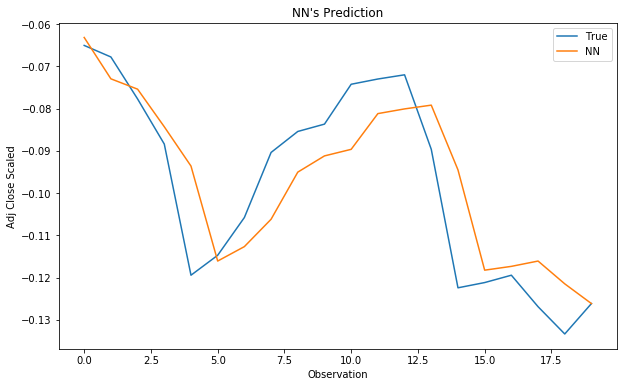

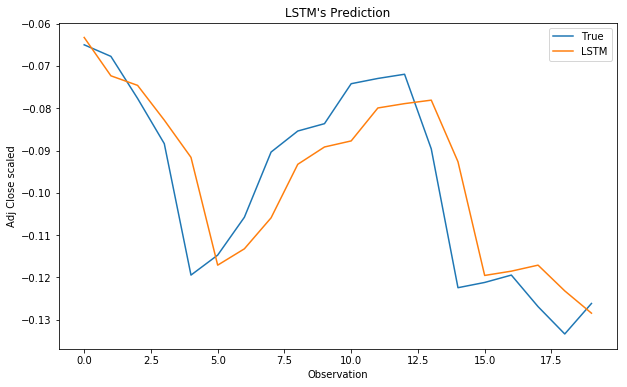

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

D'après ce résultat, on peut constater que le modèle le plus approprié entre les deux, serait le LSTM RNN avec un score légèrement plus élevé. On ne rejette donc pas l'idée que les données suivent ce modèle et ainsi on pourrait l'appliquer pour faire des prédictions.

### ARIMA model

Il est aussi possible de faire une prédiction grâce un modèle statistique classique appelé 'ARIMA'

Prenons les données antérieurs à mars 2019 et calculons les moyennes et écart-types mobiles sur 30 jours:

In [6]:
antMars = df[0:5161]

# Indexation des FME par les dates
aMarsI = antMars.set_index(['Date'])

# moyenne mobile
rolmean = aMarsI.rolling(window=30).mean()
print('rolmean: ',rolmean)

# écart type mobile
rolstd = aMarsI.rolling(window=30).std()
print('rolstd: ',rolstd)

rolmean:                     FME
Date                  
1999-01-04         NaN
1999-01-05         NaN
1999-01-06         NaN
1999-01-07         NaN
1999-01-08         NaN
1999-01-11         NaN
1999-01-12         NaN
1999-01-13         NaN
1999-01-14         NaN
1999-01-15         NaN
1999-01-18         NaN
1999-01-19         NaN
1999-01-20         NaN
1999-01-21         NaN
1999-01-22         NaN
1999-01-25         NaN
1999-01-26         NaN
1999-01-27         NaN
1999-01-28         NaN
1999-01-29         NaN
1999-02-01         NaN
1999-02-02         NaN
1999-02-03         NaN
1999-02-04         NaN
1999-02-05         NaN
1999-02-08         NaN
1999-02-09         NaN
1999-02-10         NaN
1999-02-11         NaN
1999-02-12  130.491333
...                ...
2019-01-17  126.305000
2019-01-18  126.175000
2019-01-21  126.051333
2019-01-22  125.925000
2019-01-23  125.803000
2019-01-24  125.657667
2019-01-25  125.523333
2019-01-28  125.399000
2019-01-29  125.264667
2019-01-30  125.163000
2

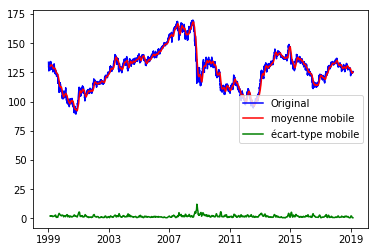

In [7]:
#Représentation graphique des moyenne et écart-type mobiles

orig_point = plt.plot(aMarsI, color='blue', label='Original')
rm_plot = plt.plot(rolmean, color='red', label='moyenne mobile')
rstd_plot = plt.plot(rolstd, color='green', label='écart-type mobile')
plt.legend(loc='best')


Procédons maintenant au test de Dickey Fuller qui détermine si une série est stationnaire ou non.

In [8]:
print('Test de Dickey Fuller')
aMarsTestDF = adfuller(aMarsI['FME'],autolag='AIC')

#On arrange l'affichage
aMarsOutput = pd.Series(aMarsTestDF[0:4],index=['Test statistic','p-value','décalages utilisés','Nombre d\'observations utilisées'])
for key,value in aMarsTestDF[4].items():
    aMarsOutput['Valeur critique (%s)'%key] = value
print(aMarsOutput)

Test de Dickey Fuller
Test statistic                       -2.063929
p-value                               0.259264
décalages utilisés                    0.000000
Nombre d'observations utilisées    5160.000000
Valeur critique (1%)                 -3.431618
Valeur critique (5%)                 -2.862100
Valeur critique (10%)                -2.567068
dtype: float64


La p-value est inférieur à la valeur critique de 5%, on ne rejette donc pas l'hypothèse que c'est une série non-stationnaire.
Nous pouvons essayer de transformer la série en série stationnaire, pour ce faire, nous allons commencer par transformer les données en logarithme.

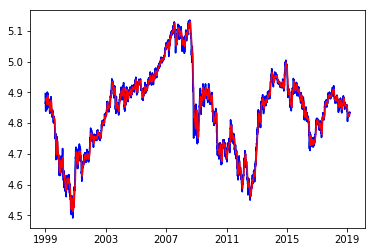

In [9]:
aMars_Log = np.log(aMarsI)
plt.plot(aMars_Log)

movingAverage =  aMars_Log.rolling(window=12).mean()
movingSTD =  aMars_Log.rolling(window=12).std()

plt.plot(aMars_Log, color = 'blue')
plt.plot(movingAverage, color= 'red')

In [10]:
aMarsTestDF_Log = adfuller(aMars_Log['FME'],autolag='AIC')

aMars_LogOutput = pd.Series(aMarsTestDF_Log[0:4],index=['Test statistic','p-value','décalages utilisés','Nombre d\'observations utilisées'])
for key,value in aMarsTestDF_Log[4].items():
    aMars_LogOutput['Valeur critique (%s)'%key] = value
print(aMars_LogOutput)

Test statistic                       -2.109931
p-value                               0.240540
décalages utilisés                    0.000000
Nombre d'observations utilisées    5160.000000
Valeur critique (1%)                 -3.431618
Valeur critique (5%)                 -2.862100
Valeur critique (10%)                -2.567068
dtype: float64


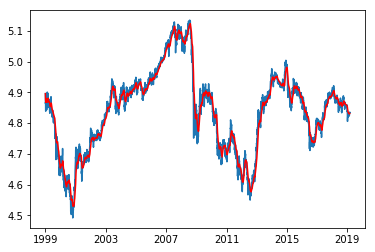

In [12]:
moyPondExp = aMars_Log.ewm(halflife=12, alpha=None, min_periods=0, adjust=True).mean()
plt.plot(aMars_Log)
plt.plot(moyPondExp,color="red")

In [ ]:
aMars_LogMoinsMPE = aMars_Log - moyPondExp


In [ ]:
def test_stationarity(timeseries):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(window = 12, center = False).mean()
    rolstd = timeseries.rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Moyenne mobile et écart-type mobile')
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    TestDF = adfuller(timeseries['FME'],autolag='AIC')

    #On arrange l'affichage
    output = pd.Series(TestDF[0:4],index=['Test statistic','p-value','décalages utilisés','Nombre d\'observations utilisées'])
    for key,value in TestDF[4].items():
        output['Valeur critique (%s)'%key] = value
    print(output)


In [ ]:
test_stationarity(aMars_LogMoinsMPE)

A présent nos données sont stationnaires.
On peut donc décomposer les séries (tendance,saison,résidu).

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompo = seasonal_decompose(aMars_Log,freq = 365)

tendance=decompo.trend
saison=decompo.seasonal
residu=decompo.resid

plt.subplot(411)
plt.plot(aMars_Log,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(tendance)
plt.plot(tendance,label='Tendance',color ='blue')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(saison)
plt.plot(saison,label='Saison',color ='blue')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residu)
plt.plot(residu,label='résidu',color ='blue')
plt.legend(loc='best')

plt.tight_layout()

Pour préparer la prédiction, nous allons appliquer le modèle ARIMA mais faire la prédiction avec Prophet. Voici donc les graphes d'auto-corrélation et d'auto-corrélation partiels

##### ARIMA

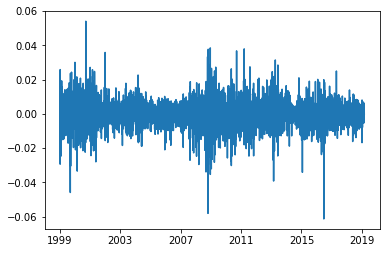

In [17]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

aMars_LogShift = aMars_Log - aMars_Log.shift()
plt.plot(aMars_LogShift)

ACF et PACF

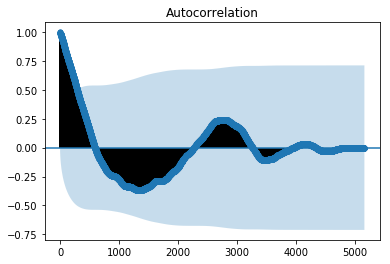

In [18]:
from pandas import Series
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
series = aMars_Log
plot_acf(series)
pyplot.show()

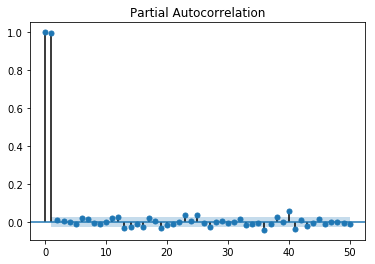

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
series = aMars_Log
plot_pacf(series, lags=50)
pyplot.show()

Testons avec différents paramètres

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


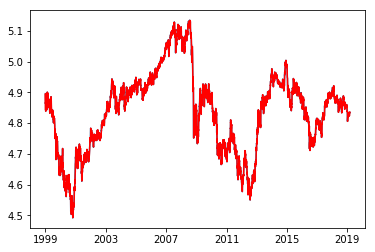

In [41]:
m = ARIMA(aMars_Log,order=(1,0,0))
resAR = m.fit(disp=1)


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


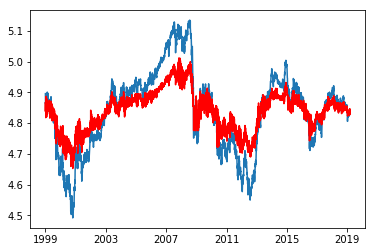

In [28]:
m = ARIMA(aMars_Log,order=(0,0,1))
resAR = m.fit(disp=1)

plt.plot(aMars_Log)
plt.plot(resAR.fittedvalues,color ='red')

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


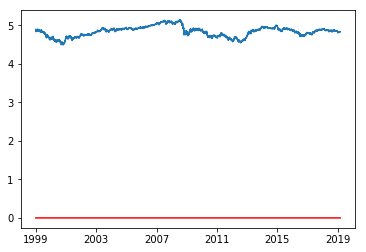

In [29]:
m = ARIMA(aMars_Log,order=(0,1,0))
resAR = m.fit(disp=1)

plt.plot(aMars_Log)
plt.plot(resAR.fittedvalues,color ='red')